<a href="https://colab.research.google.com/github/Saurabh703/Deep-Learning/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('stock_market.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
df = df.drop(['index','Date','Total Trade Quantity', 'Turnover (Lacs)'],axis=1)
df.head()

,Open,High,Low,Last,Close
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90


In [ ]:
import matplotlib.pyplot as plt

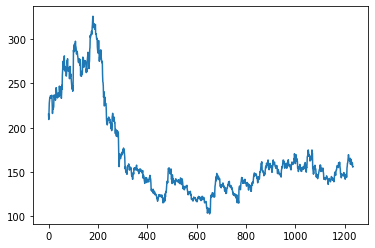

In [ ]:
plt.plot(df.Close)

In [ ]:
moving_avg = df.Close.rolling(100).mean()
moving_avg

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1230    150.0635
1231    150.2385
1232    150.4310
1233    150.5825
1234    150.7810
Name: Close, Length: 1235, dtype: float64

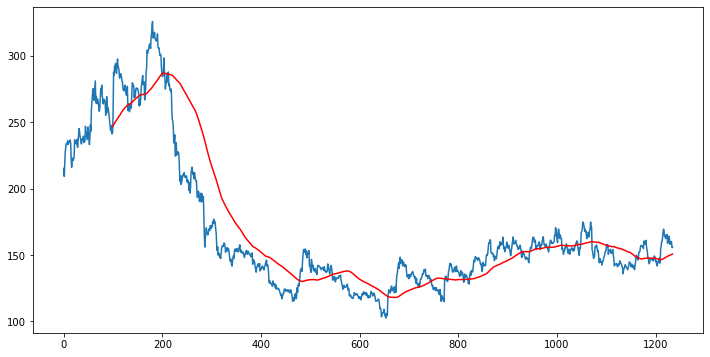

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(moving_avg, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1230    152.33475
1231    152.36350
1232    152.39675
1233    152.41000
1234    152.41300
Name: Close, Length: 1235, dtype: float64

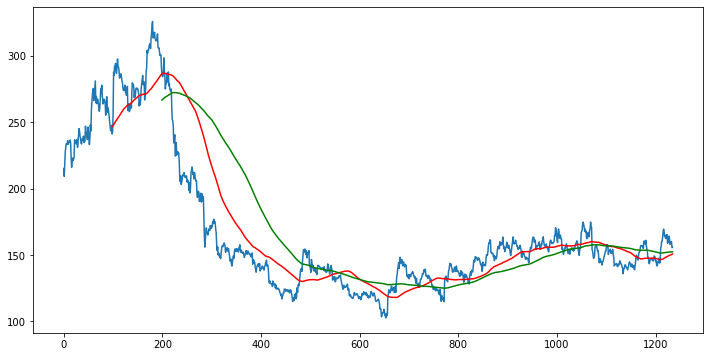

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(moving_avg, 'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(1235, 5)

In [ ]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(864, 1)
(371, 1)


In [ ]:
data_training.head()

,Close
0,215.15
1,209.20
2,218.20
3,227.60
4,230.90


In [ ]:
data_testing.head()

,Close
864,161.50
865,161.20
866,152.05
867,151.60
868,151.10


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       [0.56006275],
       [0.57485433],
       [0.58762887],
       [0.58538772],
       [0.58987001],
       [0.59816226],
       [0.58561183],
       [0.59143882],
       [0.59278351],
       [0.59345585],
       [0.60040341],
       [0.58852532],
       [0.53787539],
       [0.50806813],
       [0.5349619 ],
       [0.53922008],
       [0.53070372],
       [0.53675482],
       [0.5425818 ],
       [0.60085164],
       [0.59009413],
       [0.59771403],
       [0.5912147 ],
       [0.58583595],
       [0.60242044],
       [0.57530255],
       [0.59524877],
       [0.61810847],
       [0.63872703],
       [0.62909009],
       [0.61272972],
       [0.60466159],
       [0.5912147 ],
       [0.58673241],
       [0.60354101],
       [0.59928283],
       [0.6048857 ],
       [0.61340206],
       [0.59166293],
       [0.59524877],
       [0.59614523],
       [0.64657104],
       [0.62550426],
       [0.62572837],
       [0.611

In [ ]:
import numpy as np

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
24/24 [==============================] - 9s 151ms/step - loss: 0.0524
Epoch 2/50
24/24 [==============================] - 3s 144ms/step - loss: 0.0115
Epoch 3/50
24/24 [==============================] - 4s 150ms/step - loss: 0.0121
Epoch 4/50
24/24 [==============================] - 4s 152ms/step - loss: 0.0102
Epoch 5/50
24/24 [==============================] - 4s 157ms/step - loss: 0.0076
Epoch 6/50
24/24 [==============================] - 4s 151ms/step - loss: 0.0076
Epoch 7/50
24/24 [==============================] - 4s 152ms/step - loss: 0.0075
Epoch 8/50
24/24 [==============================] - 4s 160ms/step - loss: 0.0066
Epoch 9/50
24/24 [==============================] - 4s 161ms/step - loss: 0.0066
Epoch 10/50
24/24 [==============================] - 5s 215ms/step - loss: 0.0059
Epoch 11/50
24/24 [==============================] - 7s 278ms/step - loss: 0.0066
Epoch 12/50
24/24 [==============================] - 6s 259ms/step - loss: 0.0081
Epoch 13/50
24/24 [======

In [ ]:
model.save('keras_model_ML_stocks.h5')

In [ ]:
data_testing.head()

,Close
864,161.50
865,161.20
866,152.05
867,151.60
868,151.10


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_df.head()

,Close
0,118.85
1,115.20
2,119.60
3,118.15
4,116.35


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.06666667],
       [0.00583333],
       [0.07916667],
       [0.055     ],
       [0.025     ],
       [0.04083333],
       [0.045     ],
       [0.        ],
       [0.25916667],
       [0.30083333],
       [0.31583333],
       [0.32166667],
       [0.26916667],
       [0.2875    ],
       [0.2525    ],
       [0.30333333],
       [0.38083333],
       [0.40166667],
       [0.45166667],
       [0.48166667],
       [0.455     ],
       [0.47416667],
       [0.43333333],
       [0.4225    ],
       [0.37166667],
       [0.39666667],
       [0.37666667],
       [0.37833333],
       [0.4325    ],
       [0.43333333],
       [0.41083333],
       [0.3775    ],
       [0.44833333],
       [0.4025    ],
       [0.38583333],
       [0.38833333],
       [0.37      ],
       [0.36583333],
       [0.32833333],
       [0.31833333],
       [0.33416667],
       [0.38916667],
       [0.33583333],
       [0.35416667],
       [0.37083333],
       [0.345     ],
       [0.28916667],
       [0.245

In [ ]:
input_data.shape

(471, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(371, 100, 1)
(371,)


In [ ]:
# Making Predictions

y_predicted = model.predict(x_test)

12/12 [==============================] - 1s 45ms/step


In [ ]:
y_test

array([0.7775    , 0.7725    , 0.62      , 0.6125    , 0.60416667,
       0.61      , 0.60416667, 0.56583333, 0.58166667, 0.515     ,
       0.54083333, 0.56916667, 0.55166667, 0.53916667, 0.585     ,
       0.65      , 0.68333333, 0.6975    , 0.665     , 0.66666667,
       0.7525    , 0.71666667, 0.70666667, 0.73666667, 0.74083333,
       0.725     , 0.81166667, 0.725     , 0.6675    , 0.68666667,
       0.62833333, 0.64416667, 0.67833333, 0.685     , 0.7475    ,
       0.7025    , 0.7       , 0.67166667, 0.70916667, 0.6725    ,
       0.65833333, 0.61166667, 0.57833333, 0.62583333, 0.665     ,
       0.72833333, 0.76      , 0.8125    , 0.73083333, 0.72333333,
       0.73166667, 0.7425    , 0.77166667, 0.73333333, 0.71916667,
       0.69166667, 0.695     , 0.6575    , 0.68      , 0.66666667,
       0.67333333, 0.70833333, 0.67916667, 0.6475    , 0.56      ,
       0.555     , 0.635     , 0.6275    , 0.5975    , 0.60166667,
       0.57      , 0.56333333, 0.53333333, 0.53416667, 0.5575 

In [ ]:
y_predicted

array([[0.547014  ],
       [0.5801875 ],
       [0.6141682 ],
       [0.6438481 ],
       [0.66571   ],
       [0.6784699 ],
       [0.6826754 ],
       [0.6797926 ],
       [0.6712555 ],
       [0.65878487],
       [0.6431076 ],
       [0.62534386],
       [0.6070315 ],
       [0.58925813],
       [0.5726762 ],
       [0.55836284],
       [0.5482857 ],
       [0.5443783 ],
       [0.5475589 ],
       [0.5567339 ],
       [0.5699614 ],
       [0.5868145 ],
       [0.6058387 ],
       [0.62514293],
       [0.6436656 ],
       [0.6607161 ],
       [0.6755113 ],
       [0.68916506],
       [0.7008415 ],
       [0.70879835],
       [0.7124777 ],
       [0.71112627],
       [0.70521164],
       [0.6963404 ],
       [0.68619055],
       [0.67717683],
       [0.67019415],
       [0.6653965 ],
       [0.66202813],
       [0.6600565 ],
       [0.6587562 ],
       [0.6572883 ],
       [0.65441287],
       [0.6490062 ],
       [0.6415482 ],
       [0.63358474],
       [0.6276563 ],
       [0.626

In [ ]:
scaler.scale_

array([0.01666667])

In [ ]:
scale_factor = 1/0.01666667
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

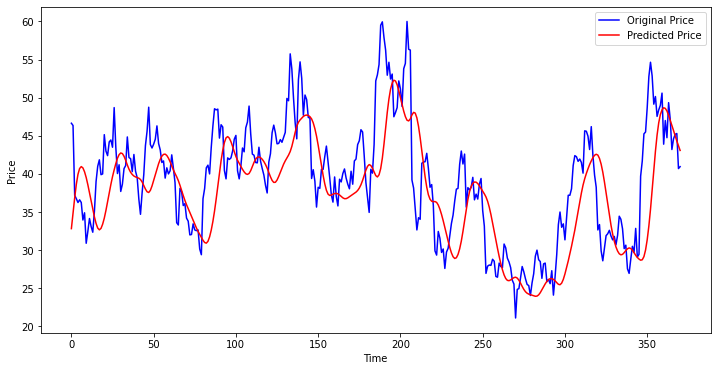

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()